In [1]:
# This is a scikit snippet
import pandas as pd
import numpy as np

from tensorflow.data import Dataset
from tensorflow.keras import utils
import pathlib

2023-03-07 09:09:26.252207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 09:09:26.582348: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-07 09:09:26.654914: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 09:09:26.654930: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
directory = '/home/johannes/code/LimesAndCrimes/project_liminal/raw_data/Images_cleaned_yj_0603'

In [3]:
ds = utils.image_dataset_from_directory(
    directory,
    labels=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(56, 56),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1399 files belonging to 1 classes.


2023-03-07 09:09:29.018946: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-07 09:09:29.019468: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-07 09:09:29.019508: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (XPS-13): /proc/driver/nvidia/version does not exist
2023-03-07 09:09:29.022121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
len(ds)

44

In [7]:
ds.element_spec

TensorSpec(shape=(None, 56, 56, 3), dtype=tf.float32, name=None)

In [48]:
data_dir = '/home/johannes/code/LimesAndCrimes/project_liminal/raw_data/Images_cleaned_yj_0603'

In [49]:
list_ds = Dataset.list_files(str(data_dir'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

SyntaxError: invalid syntax (42099216.py, line 1)

In [50]:
ds.batch()

TypeError: DatasetV2.batch() missing 1 required positional argument: 'batch_size'

In [51]:
ds.take(1)

<TakeDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)>

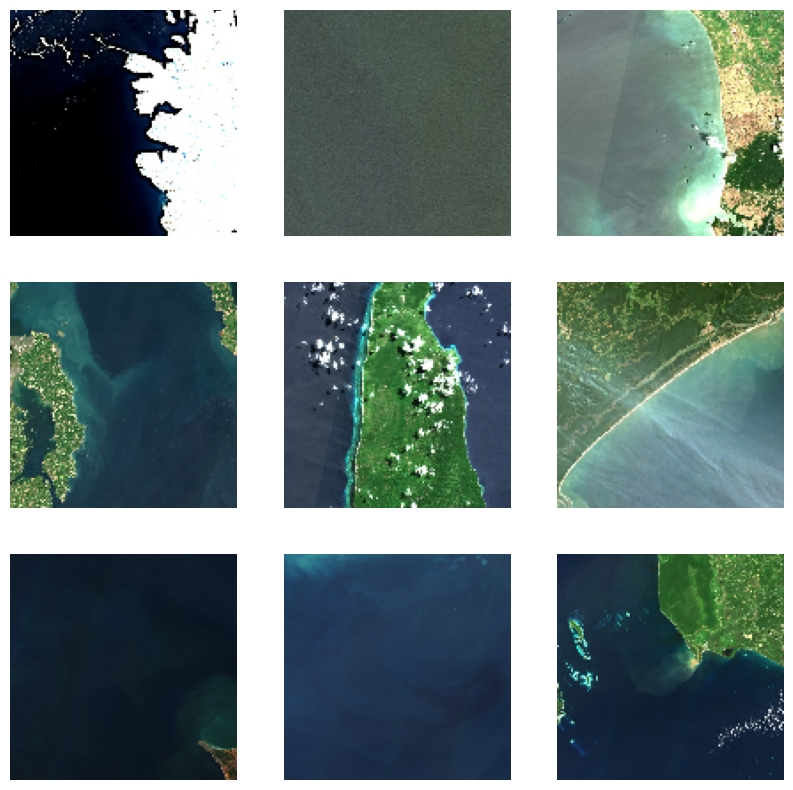

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images in ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")